In [1]:
from IPython.display import Image

Word2Vec은 단어 간 유사도를 계산하기 위해, 단어의 의미를 벡터화 하는 대표적인 방법이다. 

### 1. 희소 표현(Sparse Representation)

단어의 '의미'를 다차원 공간에 벡터화하는 방법을 **distributed representation 분산 표현**이라고 한다. Sparse Representation은 단어 유사성을 표현할 수 없기에 분산 표현을 사용한다.

### 2. 분산 표현(Distributed Representation)

distributional hypothesis 하에서 만들어진 표현 방법이다.  
즉 '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다.'라는 것이다.  

벡터의 차원이 상대적으로 저차원으로 줄어든다.  
분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현한다.

### 3. CBOW(Continuous Bag of Words)

Word2Vec은 CBoW와 Skip-Gram, 두 가지 방식이 있다.  
CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법이다.  
Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법이다.  
매커니즘 자체는 거의 동일하다.  

예측해야하는 단어를 center word,  
예측에 사용되는 단어를 context word,  
중심 단어를 예측하기 위해서 앞, 뒤 몇 개의 단어를 볼지 범위를 window  
라고 한다.  

Word2Vec은 입력층, 출력층 사이에 하나의 Proejection Layer가 있기 때문에 얕은 신경망에 해당한다.  

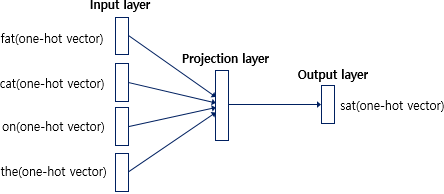

In [3]:
Image("./scr/12-03 word2vec_renew_1.png")

CBOW의 동적 메커니즘을 보자.

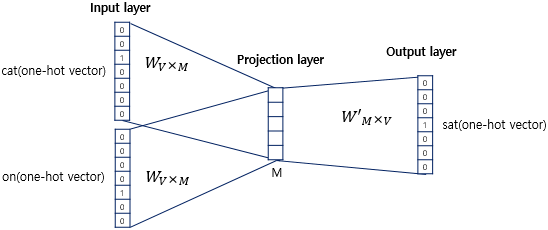

In [4]:
Image("./scr/12-03 word2vec_renew_2.png")

- 투사층의 크기는 M이다.
- 입력층과 투사층의 가중치 $W$ 는 V * M,  
  투사층과 입력층의 가중치 $W^{'}$는 M * V  이다.  
  이 두 행렬은 전혀 다른 행렬이다. transpose한 게 아니다.  

- CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 $W, W^{'}$을 학습해가는 구조이다.  

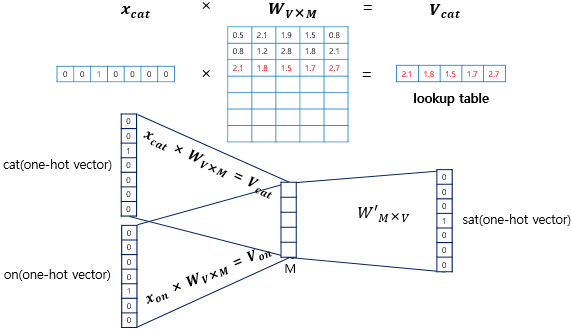

In [ ]:
Image("./scr/12-03 word2vec_renew_3.png")

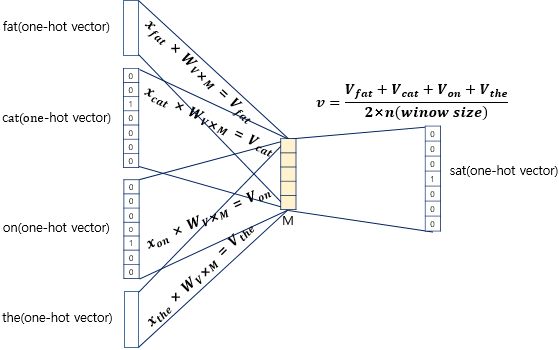

In [6]:
Image("./scr/12-03 word2vec_renew_4.png")

주변 단어의 원-핫 벡터와, 가중치 W의 곱은 아래와 같이 이뤄진다.  
W 행렬의 i번째 행을 그대로 읽어오는(lookup)하는 것과 동일하기 때문에,  
이 작업을 lookup table 이라고도 한다.

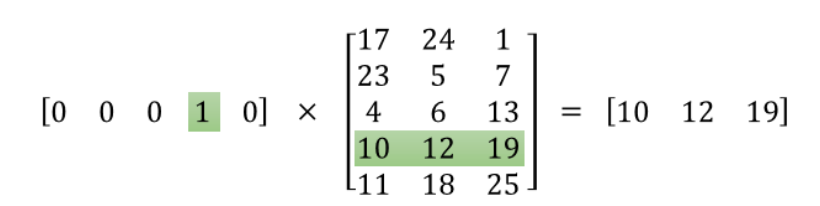

In [8]:
Image("./scr/12-03 lookup table.png")

주변 단어들의 원-핫 벡터에 가중치 W가 곱해진 결과 벡터들은  
투사층에서 만나 평균인 벡터로 구한다.  
예컨대, window size가 2라면, 입력벡터는 총 4개이므로,  
평균은 4개 결과 벡터에 대해 평균을 구하게 된다.

이렇게 구해진 평균 벡터들은 두 번째 가중치 $W^{'}$와 곱해진다.  
곱셈 결과는 원-핫 벡터들과 차원이 동일한 벡터가 나온다.  
즉, 단어 집합 크기 숫자와 차원이 동일한 벡터가 나온다는 것이다.  

곱한 결과에, softmax를 취한다.  
이 벡터를 score vector라고 한다.  

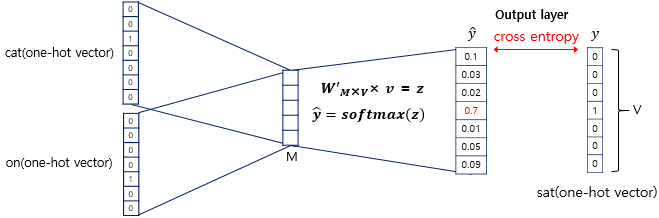

In [9]:
Image("./scr/12-03 word2vec_renew_5.png")

loss function은 아래와 같다.  
$H(\hat {y}, y) = -y_{i}log(\hat{y})$  

$\hat{y}$는 y를 정확하게 예측했다면 1, -1 log 1 = 0이 되므로,  
위의 식으로도 가능한 것이다.  

이제 Back Prop을 하면 W, W'이 학습되고,  
M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지 결정하면 된다.  

### 4. Skip-gram

CBOW와 메커니즘 자체는 동일하다.  
Skip-gram이 더 성능이 좋다고 알려져있다.

### 5. Negative Sampling

Word2Vec은 속도에서 문제가 있다.  
출력층의 소프트맥스 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1 사이의 값이면서,  
모두 더하면 1이 되도록 바꾸는 작업을 한다.  
그리고 이에 대한 오차를 구하고 모든 단어에 대한 임베딩을 조정한다.  
이는 중심 단어, 주변 단어와 전혀 상관없는 단어라도 마찬가지이다.  
단어 집합의 크기가 수백만에 달한다면 매우 무거운 작업이 된다.  

이를 좀 더 효율적으로 하기 위한 방법이 Negative Sampling이다.  
1. 일부 단어 집합을 만든다.
2. 주변 단어들을 일부 가져온다. (Positive)
3. 주변 단어가 아닌 상관없는 단어를 일부 가져온다. (Negative)
4. 훨씬 작은 단어 집합은 만들고 이진 분류 문제로 바꾼다.